In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = 5.

In [3]:
x_dataset = np.linspace(-1, 1, 100)

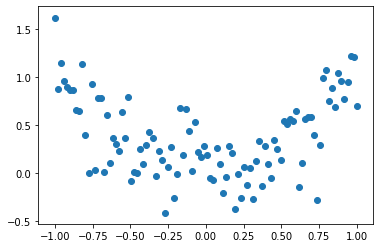

In [4]:
num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

plt.scatter(x_dataset, y_dataset)
plt.show()

In [5]:
(x_train, x_test, y_train, y_test) = train_test_split(x_dataset, y_dataset, test_size = 0.3, random_state = 0)

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [7]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

In [8]:
w = tf.Variable([0.] * num_coeffs, name = "parameters")
y_model = model(X, w)
cost = tf.div(
    tf.add(tf.reduce_sum(tf.square(Y-y_model)),
          tf.multiply(reg_lambda,
                     tf.reduce_sum(tf.square(w))))
    ,2*x_train.size)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [9]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()

In [11]:
sess.run(init)

In [12]:
for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y: y_test})
    print('reg_lambda', reg_lambda)
    
print('final cost', final_cost)

w_val = sess.run(w)

print(w_val)

reg_lambda 0.0
reg_lambda 0.010101010101010102
reg_lambda 0.020202020202020204
reg_lambda 0.030303030303030304
reg_lambda 0.04040404040404041
reg_lambda 0.05050505050505051
reg_lambda 0.06060606060606061
reg_lambda 0.07070707070707072
reg_lambda 0.08080808080808081
reg_lambda 0.09090909090909091
reg_lambda 0.10101010101010102
reg_lambda 0.11111111111111112
reg_lambda 0.12121212121212122
reg_lambda 0.13131313131313133
reg_lambda 0.14141414141414144
reg_lambda 0.15151515151515152
reg_lambda 0.16161616161616163
reg_lambda 0.17171717171717174
reg_lambda 0.18181818181818182
reg_lambda 0.19191919191919193
reg_lambda 0.20202020202020204
reg_lambda 0.21212121212121213
reg_lambda 0.22222222222222224
reg_lambda 0.23232323232323235
reg_lambda 0.24242424242424243
reg_lambda 0.25252525252525254
reg_lambda 0.26262626262626265
reg_lambda 0.27272727272727276
reg_lambda 0.2828282828282829
reg_lambda 0.29292929292929293
reg_lambda 0.30303030303030304
reg_lambda 0.31313131313131315
reg_lambda 0.323232323

In [13]:
sess.close()

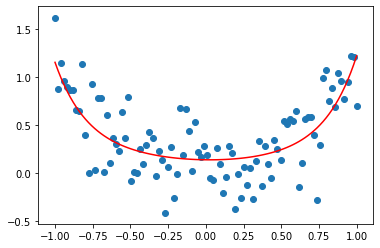

In [14]:
plt.scatter(x_dataset, y_dataset)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(x_dataset, i)
    
plt.plot(x_dataset, trY2, 'r')
plt.show()